## 02: Data Preparation Subprime

1. Here we construct our dataset for use in the experiment.

In [1]:
# import required libraries
import sys
sys.path.append('../../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import libs.utils as utils
import libs.bounding_box as bounding_box
import libs.patch_tools as patch_tools
import libs.data_prep as data_prep
import libs.train_test_split as tts
import libs.importing as importing
import libs.render as render
import libs.stats as stats
import libs.patch_tools as patch_tools
from importlib import reload


# set the random seed for we always get the same results (for now)
random.seed(42)


In [3]:
# GENERATE DATASET ID
exp_id = utils.short_id()
# use same data
exp_id = '6eb279af'
print('ID: {}'.format(exp_id))

ID: 6eb279af


In [4]:
# COPY DATA and SETUP EXPERIMENT
base_dir = '../source_dataset/all_v1'
data_prep.setup_experiment(base_dir, exp_id)

In [5]:
# 2-CLASS PROBLEM : Benign v. Papilloma

# SETUP : GET ALL CONTOURS
roi_df = pd.read_csv(os.path.join(exp_id, 'contours.csv'))
roi_2class = roi_df.copy()

# merge dysplasias and carcinomas
roi_2class = roi_2class[roi_2class.label.isin([1,2])].reset_index(drop=True)

train2bp_df, test2bp_df, val2bp_df = tts.train_test_validation_split(roi_2class, classes=[1,2], samples=3)

# SAVE : save the results
train2bp_df.to_csv(os.path.join(exp_id, 'contours_train.csv'), index=False)
test2bp_df.to_csv(os.path.join(exp_id, 'contours_test.csv'), index=False)
val2bp_df.to_csv(os.path.join(exp_id, 'contours_val.csv'), index=False)

n: 50
distribution: [1 2] [30 20]
classes: [1 2], samples_per_class: 3
train-n: 38
test-n: 6
val-n: 6


In [18]:
# OR IF we've already run this notebook before we can just load the data
train2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_train.csv'))
test2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_test.csv'))
val2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_val.csv'))

In [6]:
# LOG : show all the contours we dumped and those we are using
#       these are logged at: 
#       [dumped] ./exp_id/log/eleminated_contours
#       [kept]   ./exp_id/log/experiment_contours
data_prep.show_contours_for_experiment(exp_id, roi_df, roi_2class)

total contours: 97
eliminated contours: 47
kept contours: 50


image_id        id          name  label
0   hgv-44a1f2e3  2dd43905  2dd43905.csv      4
1   hgv-453fea32  d50cc4f8  d50cc4f8.csv      4
2   hgv-6b73633f  3570bc50  3570bc50.csv      4
3   hgv-2cdb69f6  8206157b  8206157b.csv      3
4   hgv-2cdb69f6  1c013836  1c013836.csv      3
5   hgv-de605528  3d9f5a64  3d9f5a64.csv      4
6   hgv-dffcce57  162054c8  162054c8.csv      4
7   hgv-1cc11649  93f87e79  93f87e79.csv      4
8   hgv-6d2317b0  ed68be3f  ed68be3f.csv      4
9   mdi-9abd4637  ad1b57ba  ad1b57ba.csv      4
10  mdi-9abd4637  a587fb0a  a587fb0a.csv      4
11  mdi-9abd4637  3461fc88  3461fc88.csv      4
12  mdi-e3b0c312  86a09485  86a09485.csv      4
13  mdi-e3b0c312  319a6d2d  319a6d2d.csv      4
14  mdi-1061cc91  fc982917  fc982917.csv      3
15  mdi-1061cc91  56ad66ea  56ad66ea.csv      3
16  mdi-461bdebc  7a876ffc  7a876ffc.csv      4
17  mdi-461bdebc  c9454f57  c9454f57.csv      4
18  mdi-945f5ac6  c344443d  c344443d.csv      4
19  mdi-f5cb6906  f521a3e0  f521a3e0.csv      4
20  mdi-f5cb6906  84751607  84751607.csv      4
21  mdi-df9a656f  40b3ce8d  40b3ce8d.csv      4
22  mdi-df9a656f  f492e96f  f492e96f.csv      4
23  mdi-df9a656f  d6675d6a  d6675d6a.csv      4
24  mdi-b731a91f  45b886e2  45b886e2.csv      4
25  mdi-b731a91f  93cdba18  93cdba18.csv      4
26  mdi-b731a91f  c32037c6  c32037c6.csv      4
27  mdi-9ce9698b  e3385444  e3385444.csv      4
28  mdi-9ce9698b  b4529522  b4529522.csv      4
29  mdi-9ce9698b  2bac5541  2bac5541.csv      4
30  mdi-5e3d3832  9bb4c49e  9bb4c49e.csv      4
31  mdi-5e3d3832  83fc7472  83fc7472.csv      4
32  mdi-f3f9ede5  7ce56377  7ce56377.csv      4
33  mdi-f3f9ede5  8bfb34ca  8bfb34ca.csv      4
34  odi-963ee4be  b2dc8fe7  b2dc8fe7.csv      4
35  odi-1767f1a2  efe502d8  efe502d8.csv      4
36  odi-7a9f9582  d3319c36  d3319c36.csv      4
37  odi-8ad90fea  85063d46  85063d46.csv      3
38  odi-2511b830  5d2996e2  5d2996e2.csv      3
39  odi-423f2ec2  195132b2  195132b2.csv      3
40  odi-556875fe  6c195ab0  6c195ab0.csv      3
41  odi-556875fe  ed2fb154  ed2fb154.csv      3
42  odi-556875fe  0099267b  0099267b.csv      3
43  odi-0294ae4c  3f7e68a5  3f7e68a5.csv      4
44  odi-28084697  1b95bdd9  1b95bdd9.csv      3
45  odi-28084697  ecc70713  ecc70713.csv      3
46  odi-28084697  938c1205  938c1205.csv      3

In [10]:
# TRAIN : data setup
#       : creates a directory ./exp_id/train/  where all the images and contours for training are stored
#       : creates a directory ./exp_id/train/log/info, where the contours and labels for the training set are stored as images for debugging purposes. 
train_df  = pd.read_csv(os.path.join(exp_id, 'contours_train.csv'))
data_prep.setup_component(exp_id, train_df, 'train')
data_prep.log_component_info(os.path.join(exp_id, 'train'))

In [8]:
# TEST : data setup
#       : creates a directory ./exp_id/test/  where all the images and contours for test data are stored
#       : creates a directory ./exp_id/test/log/info, where the contours and labels for the test set are stored as images for debugging purposes.
test_df = pd.read_csv(os.path.join(exp_id, 'contours_test.csv'))
data_prep.setup_component(exp_id, test_df, 'test')
data_prep.log_component_info(os.path.join(exp_id, 'test'))

In [9]:
# VALIDATION : data setup
#       : creates a directory ./exp_id/val/  where all the images and contours for validation data are stored
#       : creates a directory ./exp_id/val/log/info, where the contours and labels for the validation set are stored as images for debugging purposes.
val_df = pd.read_csv(os.path.join(exp_id, 'contours_val.csv'))
data_prep.setup_component(exp_id, val_df, 'val')
data_prep.log_component_info(os.path.join(exp_id, 'val'))

In [11]:
# GENERATE PATCHES : training data
#                    logs information to ./exp_id/train/log/setup_patches, where it shows patches on the image before and after removal

# threshold : the percentage a patch needs to overlap with the contour polygon in order to not be discarded
# patch_overlap : the shift size, should be a value which generates a factor of 64 for instance 0.5*64 = 32, or 0.25 * 64 = 16, etc.
train_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'train'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

# inspect the structure of our patches.csv file
display(train_patches_df.head())

# see how many training patches we have 
print('count: {}'.format(len(train_patches_df)))

image_id contour_id  patch_id    patch_name     x    y label_id
0  hgv-44a1f2e3   3cde1351  872a3682  872a3682.jpg  1279  168        1
1  hgv-44a1f2e3   3cde1351  5c79f949  5c79f949.jpg  1311  168        1
2  hgv-44a1f2e3   3cde1351  967e4494  967e4494.jpg  1279  200        1
3  hgv-44a1f2e3   3cde1351  58fa9220  58fa9220.jpg  1311  200        1
4  hgv-44a1f2e3   3cde1351  0bd9120a  0bd9120a.jpg  1343  200        1

count: 1555


In [12]:
# GENERATE PATCHES : test data
#                    logs information to ./exp_id/test/log/setup_patches, where it shows patches on the image before and after removal
test_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'test'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(test_patches_df.head())
print('count: {}'.format(len(test_patches_df)))

image_id contour_id  patch_id    patch_name     x    y label_id
0  hgv-99fc12a1   51b064d6  9dada89d  9dada89d.jpg  1214  306        2
1  hgv-99fc12a1   51b064d6  e1a70ba9  e1a70ba9.jpg  1246  306        2
2  hgv-99fc12a1   51b064d6  88dd3beb  88dd3beb.jpg  1278  306        2
3  hgv-99fc12a1   51b064d6  b1db2fc9  b1db2fc9.jpg  1310  306        2
4  hgv-99fc12a1   51b064d6  4ef817ba  4ef817ba.jpg  1214  338        2

count: 177


In [13]:
# GENERATE PATCHES : validation data
#                    logs information to ./exp_id/val/log/setup_patches, where it shows patches on the image before and after removal
val_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'val'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(val_patches_df.head())
print('count: {}'.format(len(val_patches_df)))

image_id contour_id  patch_id    patch_name     x   y label_id
0  hgv-8528141b   9be9ecb7  e900acd8  e900acd8.jpg  1415  11        1
1  hgv-8528141b   9be9ecb7  79afc939  79afc939.jpg  1447  11        1
2  hgv-8528141b   9be9ecb7  625abd91  625abd91.jpg  1479  11        1
3  hgv-8528141b   9be9ecb7  3db63f55  3db63f55.jpg  1511  11        1
4  hgv-8528141b   9be9ecb7  0b223878  0b223878.jpg  1543  11        1

count: 201


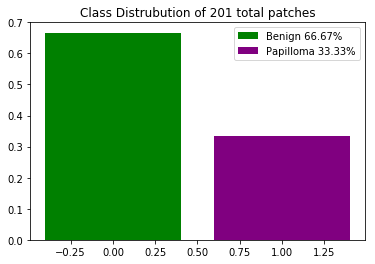

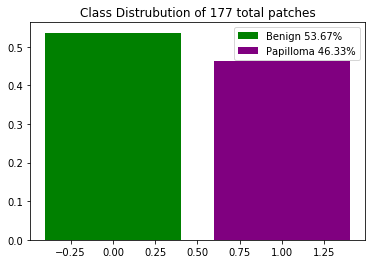

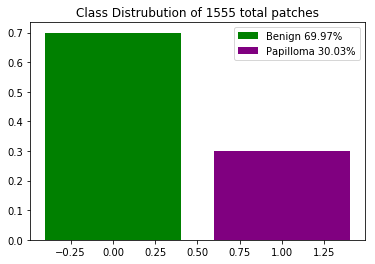

In [14]:
# BEFORE FILTERING PATCHES LOOK AT PATCH DISTRIBUTION
stats.plot_label_distribution(val_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(test_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(train_patches_df, labels=[1,2], label_key='label_id')

In [15]:
# FILTER PATCHES : some patches have way too much light or are just bad quality
#                  here we filter out patches which are so specular they contain very little information
#                  see: filtered patches are drawn onto the image at : ./exp_id/{train,test,val}/log/filter_highlight_patches - useful for debugging

train_dir = os.path.join(exp_id, 'train')
test_dir = os.path.join(exp_id, 'test')
val_dir = os.path.join(exp_id, 'val')

data_prep.filter_highlight_patches_for(train_dir, patch_size = 64, threshold=0.4)
data_prep.filter_highlight_patches_for(test_dir, patch_size = 64, threshold=0.4)
data_prep.filter_highlight_patches_for(val_dir, patch_size = 64, threshold=0.4)


bad patches: 2
before: 1555
cleaned: 1553
bad patches: 0
before: 177
cleaned: 177
bad patches: 0
before: 201
cleaned: 201


image_id contour_id  patch_id    patch_name     x    y  label_id
0    hgv-8528141b   9be9ecb7  e900acd8  e900acd8.jpg  1415   11         1
1    hgv-8528141b   9be9ecb7  79afc939  79afc939.jpg  1447   11         1
2    hgv-8528141b   9be9ecb7  625abd91  625abd91.jpg  1479   11         1
3    hgv-8528141b   9be9ecb7  3db63f55  3db63f55.jpg  1511   11         1
4    hgv-8528141b   9be9ecb7  0b223878  0b223878.jpg  1543   11         1
5    hgv-8528141b   9be9ecb7  fbe5e493  fbe5e493.jpg  1383   43         1
6    hgv-8528141b   9be9ecb7  b18d192a  b18d192a.jpg  1415   43         1
7    hgv-8528141b   9be9ecb7  f5634a2f  f5634a2f.jpg  1447   43         1
8    hgv-8528141b   9be9ecb7  eae89a3f  eae89a3f.jpg  1479   43         1
9    hgv-8528141b   9be9ecb7  23592544  23592544.jpg  1511   43         1
10   hgv-8528141b   9be9ecb7  c234dbe8  c234dbe8.jpg  1543   43         1
11   hgv-8528141b   9be9ecb7  64ad99fc  64ad99fc.jpg  1383   75         1
12   hgv-8528141b   9be9ecb7  7934288a  7934288a.jpg  1415   75         1
13   hgv-8528141b   9be9ecb7  30c8df43  30c8df43.jpg  1447   75         1
14   hgv-8528141b   9be9ecb7  cb864275  cb864275.jpg  1479   75         1
15   hgv-8528141b   9be9ecb7  d749ca6d  d749ca6d.jpg  1511   75         1
16   hgv-8528141b   9be9ecb7  e6491df1  e6491df1.jpg  1383  107         1
17   hgv-8528141b   9be9ecb7  90f709ba  90f709ba.jpg  1415  107         1
18   hgv-8528141b   9be9ecb7  df68cbc0  df68cbc0.jpg  1447  107         1
19   hgv-8528141b   9be9ecb7  75fdd64c  75fdd64c.jpg  1479  107         1
20   hgv-8528141b   9be9ecb7  6314904b  6314904b.jpg  1511  107         1
21   hgv-8528141b   9be9ecb7  11c8e602  11c8e602.jpg  1383  139         1
22   hgv-8528141b   9be9ecb7  fd38c69b  fd38c69b.jpg  1415  139         1
23   hgv-8528141b   9be9ecb7  e1f8c256  e1f8c256.jpg  1447  139         1
24   hgv-8528141b   9be9ecb7  fbbeea64  fbbeea64.jpg  1479  139         1
25   hgv-8528141b   9be9ecb7  252a6fb1  252a6fb1.jpg  1511  139         1
26   hgv-99fc12a1   93d2c382  4a844c9c  4a844c9c.jpg  1019  643         2
27   hgv-99fc12a1   93d2c382  fbed90bd  fbed90bd.jpg   987  675         2
28   hgv-99fc12a1   93d2c382  7f958481  7f958481.jpg  1019  675         2
29   hgv-99fc12a1   93d2c382  5300fec0  5300fec0.jpg   987  707         2
..            ...        ...       ...           ...   ...  ...       ...
171  odi-ea593e69   1a234d1d  ace8b3d3  ace8b3d3.jpg   377  170         2
172  odi-ea593e69   1a234d1d  5ae700ba  5ae700ba.jpg   217  202         2
173  odi-ea593e69   1a234d1d  da3ff35b  da3ff35b.jpg   249  202         2
174  odi-ea593e69   1a234d1d  719b0a01  719b0a01.jpg   281  202         2
175  odi-ea593e69   1a234d1d  4d2edd76  4d2edd76.jpg   313  202         2
176  odi-ea593e69   1a234d1d  b80e577b  b80e577b.jpg   345  202         2
177  odi-ea593e69   1a234d1d  66516b56  66516b56.jpg   377  202         2
178  odi-ea593e69   1a234d1d  853187e4  853187e4.jpg   249  234         2
179  odi-ea593e69   1a234d1d  0bea81b6  0bea81b6.jpg   281  234         2
180  odi-ea593e69   1a234d1d  6784b55c  6784b55c.jpg   313  234         2
181  odi-ea593e69   1a234d1d  150e55f9  150e55f9.jpg   345  234         2
182  odi-ea593e69   1a234d1d  4b8f6366  4b8f6366.jpg   377  234         2
183  odi-ea593e69   1a234d1d  09c69241  09c69241.jpg   249  266         2
184  odi-ea593e69   1a234d1d  e9881a79  e9881a79.jpg   281  266         2
185  odi-ea593e69   1a234d1d  7c33fcee  7c33fcee.jpg   313  266         2
186  odi-ea593e69   1a234d1d  e09f6195  e09f6195.jpg   345  266         2
187  odi-ea593e69   1a234d1d  66775712  66775712.jpg   377  266         2
188  odi-ea593e69   1a234d1d  355d3dac  355d3dac.jpg   249  298         2
189  odi-ea593e69   1a234d1d  848446f9  848446f9.jpg   281  298         2
190  odi-ea593e69   1a234d1d  35c7a07a  35c7a07a.jpg   313  298         2
191  odi-ea593e69   1a234d1d  2d5a9b93  2d5a9b93.jpg   345  298         2
192  odi-ea593e69   1a234d1d  ec197b10  ec197b10.jpg   377  298         2
193  odi-ea59

In [16]:
## READ PATCHES : check to ensure we are ready to go to the next step
trainp_df = pd.read_csv(os.path.join(train_dir, 'patches_cleaned.csv'), index_col=False)
testp_df = pd.read_csv(os.path.join(test_dir, 'patches_cleaned.csv'), index_col=False)
valp_df = pd.read_csv(os.path.join(val_dir, 'patches_cleaned.csv'), index_col=False)

train_pdr = importing.PatchDataReader(os.path.join(train_dir, 'patches'), trainp_df)
test_pdr = importing.PatchDataReader(os.path.join(test_dir, 'patches'), testp_df)
val_pdr = importing.PatchDataReader(os.path.join(val_dir, 'patches'), valp_df)

train_img, train_labels = train_pdr.read_data()
test_img, test_labels = test_pdr.read_data()
val_img, val_labels = val_pdr.read_data()

display('train images: {}'.format(len(train_img)))
display('train labels: {}'.format(len(train_labels)))
display('test images: {}'.format(len(test_img)))
display('test labels: {}'.format(len(test_labels)))
display('val images: {}'.format(len(val_labels)))
display('val labels: {}'.format(len(val_img)))


'train images: 1553'

'train labels: 1553'

'test images: 177'

'test labels: 177'

'val images: 201'

'val labels: 201'

In [17]:
# CREATE SHUFFLED DATA

## READ PATCHES : check to ensure we are ready to go to the next step
trainp_df = pd.read_csv(os.path.join(train_dir, 'patches_cleaned.csv'), index_col=False)
testp_df = pd.read_csv(os.path.join(test_dir, 'patches_cleaned.csv'), index_col=False)
valp_df = pd.read_csv(os.path.join(val_dir, 'patches_cleaned.csv'), index_col=False)

idxs = data_prep.shuffle_indices(len(trainp_df))
shuffled_train_df = trainp_df.loc[idxs].reset_index(drop=True)
shuffled_train_df.to_csv(os.path.join(train_dir, 'patches_cleaned_shuffled.csv'), index=False)

idxs = data_prep.shuffle_indices(len(testp_df))
shuffled_test_df = testp_df.loc[idxs].reset_index(drop=True)
shuffled_test_df.to_csv(os.path.join(test_dir, 'patches_cleaned_shuffled.csv'), index=False)

idxs = data_prep.shuffle_indices(len(valp_df))
shuffled_val_df = valp_df.loc[idxs].reset_index(drop=True)
shuffled_val_df.to_csv(os.path.join(val_dir, 'patches_cleaned_shuffled.csv'), index=False)



In [18]:
## Visualize the patches
data_prep.log_patch_data_reader(train_dir, train_pdr)
data_prep.log_patch_data_reader(test_dir, test_pdr)
data_prep.log_patch_data_reader(val_dir, val_pdr)